# Summary

Dans ce notebook, nous allons mettre en pratique les algorithmes de regression sur un jeu de données relatif aux faux billets de banque.

Pour rappel, voici **quelques étapes de travail** d'un **Data Scientist** sont les suivantes:

![image.png](attachment:0e82b165-14b0-416e-8e0b-49bfa12a06fd.png)

# Packages

In [1]:
!pip install pathlib
!pip install missingno
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install yellowbrick
!pip install ydata-profiling
!pip install plotly

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 390.6/390.6 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 18.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 686.1/686.1 kB 25.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 48.2 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=da9dd42c1a36e33c984154ae2e665b03b50f0dd57e26a5c81a0dd430c990eb6a
  Stored in directory: /root/.cache/pip/wheels/dd/91/29/a79cecb328d01739e64017b6fb9a1ab9d8cb1853098ec5966d
Successfully built htmlmin


In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import plotly.express as px
import plotly.graph_objs as go
import seaborn as sns
from plotly.subplots import make_subplots
from ydata_profiling import ProfileReport
from yellowbrick.regressor import ResidualsPlot


# Data collection

In [3]:
from google.colab import files
uploaded = files.upload()

Saving billets.csv to billets.csv


pd.read_csv?

In [4]:
data = pd.read_csv("billets.csv",sep=";")




In [5]:
# Return the first `n` rows, default is 5
data.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,True,171.81,104.86,104.95,4.52,2.89,112.83
1,True,171.46,103.36,103.66,3.77,2.99,113.09
2,True,172.69,104.48,103.50,4.40,2.94,113.16
3,True,171.36,103.91,103.94,3.62,3.01,113.51
4,True,171.73,104.28,103.46,4.04,3.48,112.54


In [6]:
# Print a concise summary of a DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1500 non-null   bool   
 1   diagonal      1500 non-null   float64
 2   height_left   1500 non-null   float64
 3   height_right  1500 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1500 non-null   float64
 6   length        1500 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 71.9 KB


In [7]:
# Generate descriptive statistics
data.describe(include="all")

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
count,1500,1500.000000,1500.000000,1500.000000,1463.000000,1500.000000,1500.00000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN
top,True,NaN,NaN,NaN,NaN,NaN,NaN
freq,1000,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,171.958440,104.029533,103.920307,4.485967,3.151473,112.67850
std,NaN,0.305195,0.299462,0.325627,0.663813,0.231813,0.87273
min,NaN,171.040000,103.140000,102.820000,2.980000,2.270000,109.49000
25%,NaN,171.750000,103.820000,103.710000,4.015000,2.990000,112.03000
50%,NaN,171.960000,104.040000,103.920000,4.310000,3.140000,112.96000
75%,NaN,172.170000,104.230000,104.150000,4.870000,3.310000,113.34000


# Exploration: EDA (Exploratory Data Analysis)

Explorez les donénes avec les libraires, ex: missingno, plotly, seaborn, ydata-profiling,

## Missing values

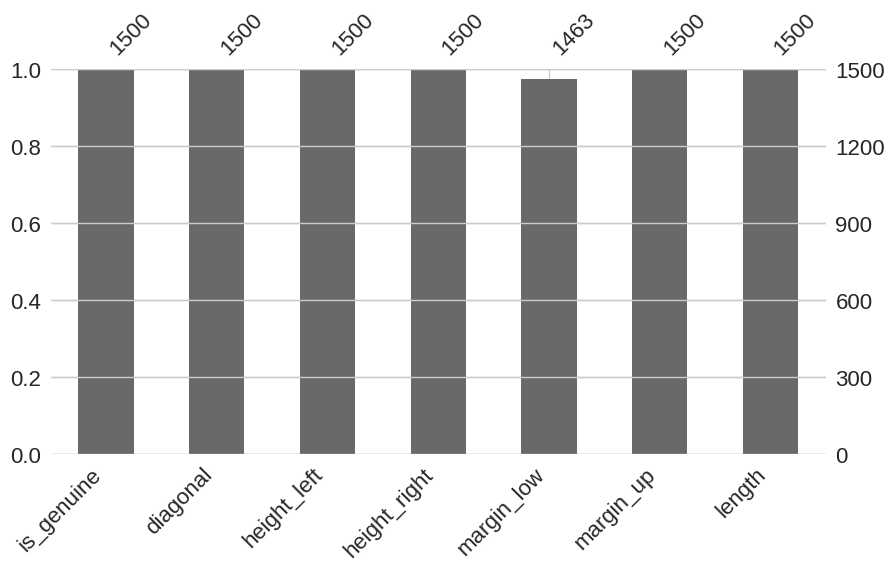

In [8]:
# A bar chart visualization of the nullity of the given DataFrame.
msno.bar(data, figsize=(10, 5));

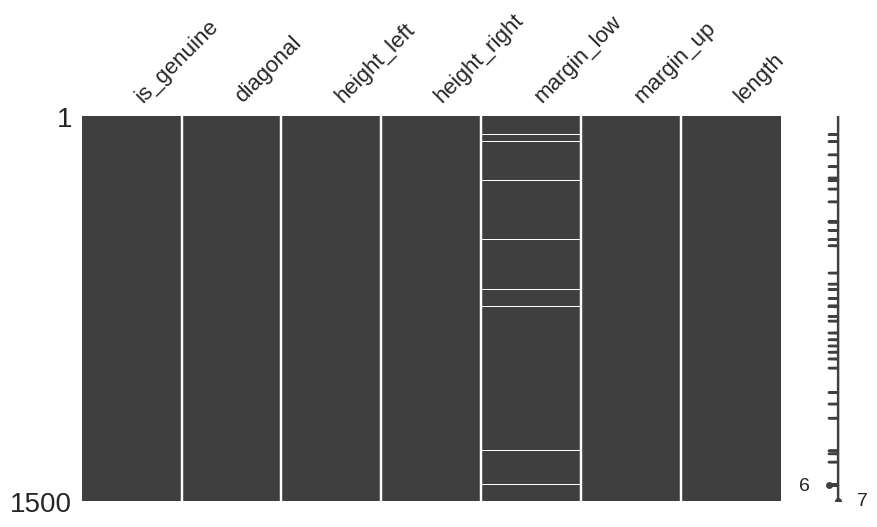

In [9]:
# A matrix visualization of the nullity of the given DataFrame (pick out patterns in data completion).

msno.matrix(data, figsize=(10, 5));

In [10]:
# Return a Series containing counts of unique values.

data.is_genuine.value_counts(dropna=False,  # If True, don't include counts of NaN.
                             normalize=False,  # If True then the object returned will contain the relative frequencies of the unique values.
                            )

,count
is_genuine,
True,1000
False,500


## Seaborn

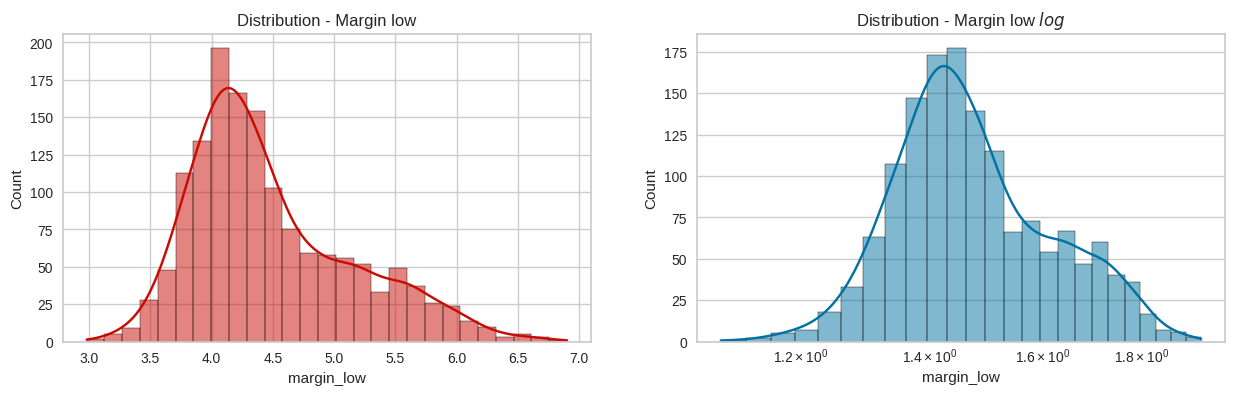

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))

sns.histplot(data["margin_low"], color='r', kde=True, ax=axes[0])
axes[0].set_title('Distribution - Margin low')

sns.histplot(np.log(data["margin_low"]), color='b', kde=True, ax=axes[1])
axes[1].set_title('Distribution - Margin low $log$')
axes[1].set_xscale('log');

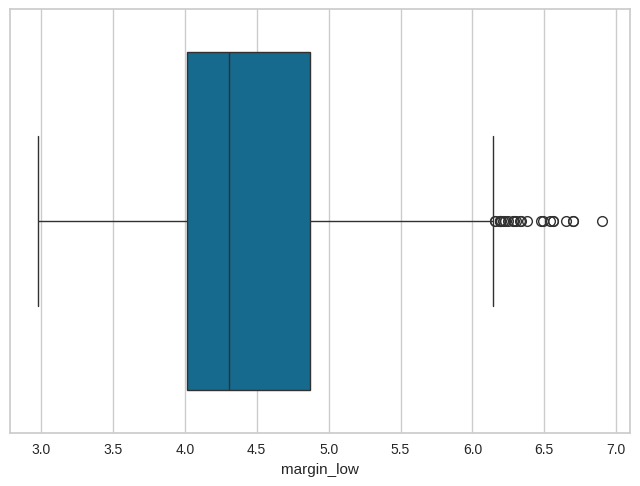

In [12]:
sns.boxplot(data["margin_low"], orient="h");

<ipython-input-13-20d473c7e8a5>:7: UserWarning: When passing multiple axes, sharex and sharey are ignored. These settings must be specified when creating axes.
  data.boxplot(column=num_columns, by="is_genuine", ax=ax, grid=False,);


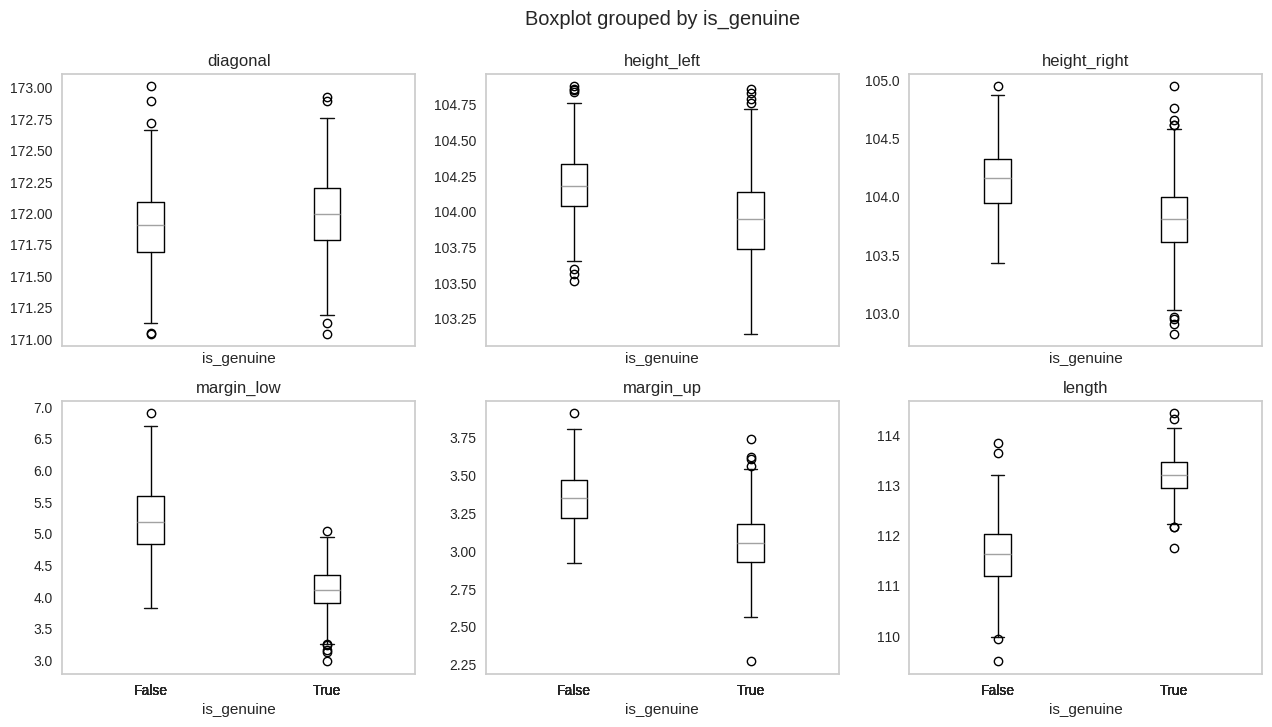

In [13]:
# distribution en fonction du type de billet (Faux vs Vrai)

num_columns = list(data.select_dtypes(include=[int, float]).columns) # extraction des colonnes numériques/décimales
# définition des caratéritiques de graph
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(15, 8), sharey=False, sharex=True)
# box plot
data.boxplot(column=num_columns, by="is_genuine", ax=ax, grid=False,);

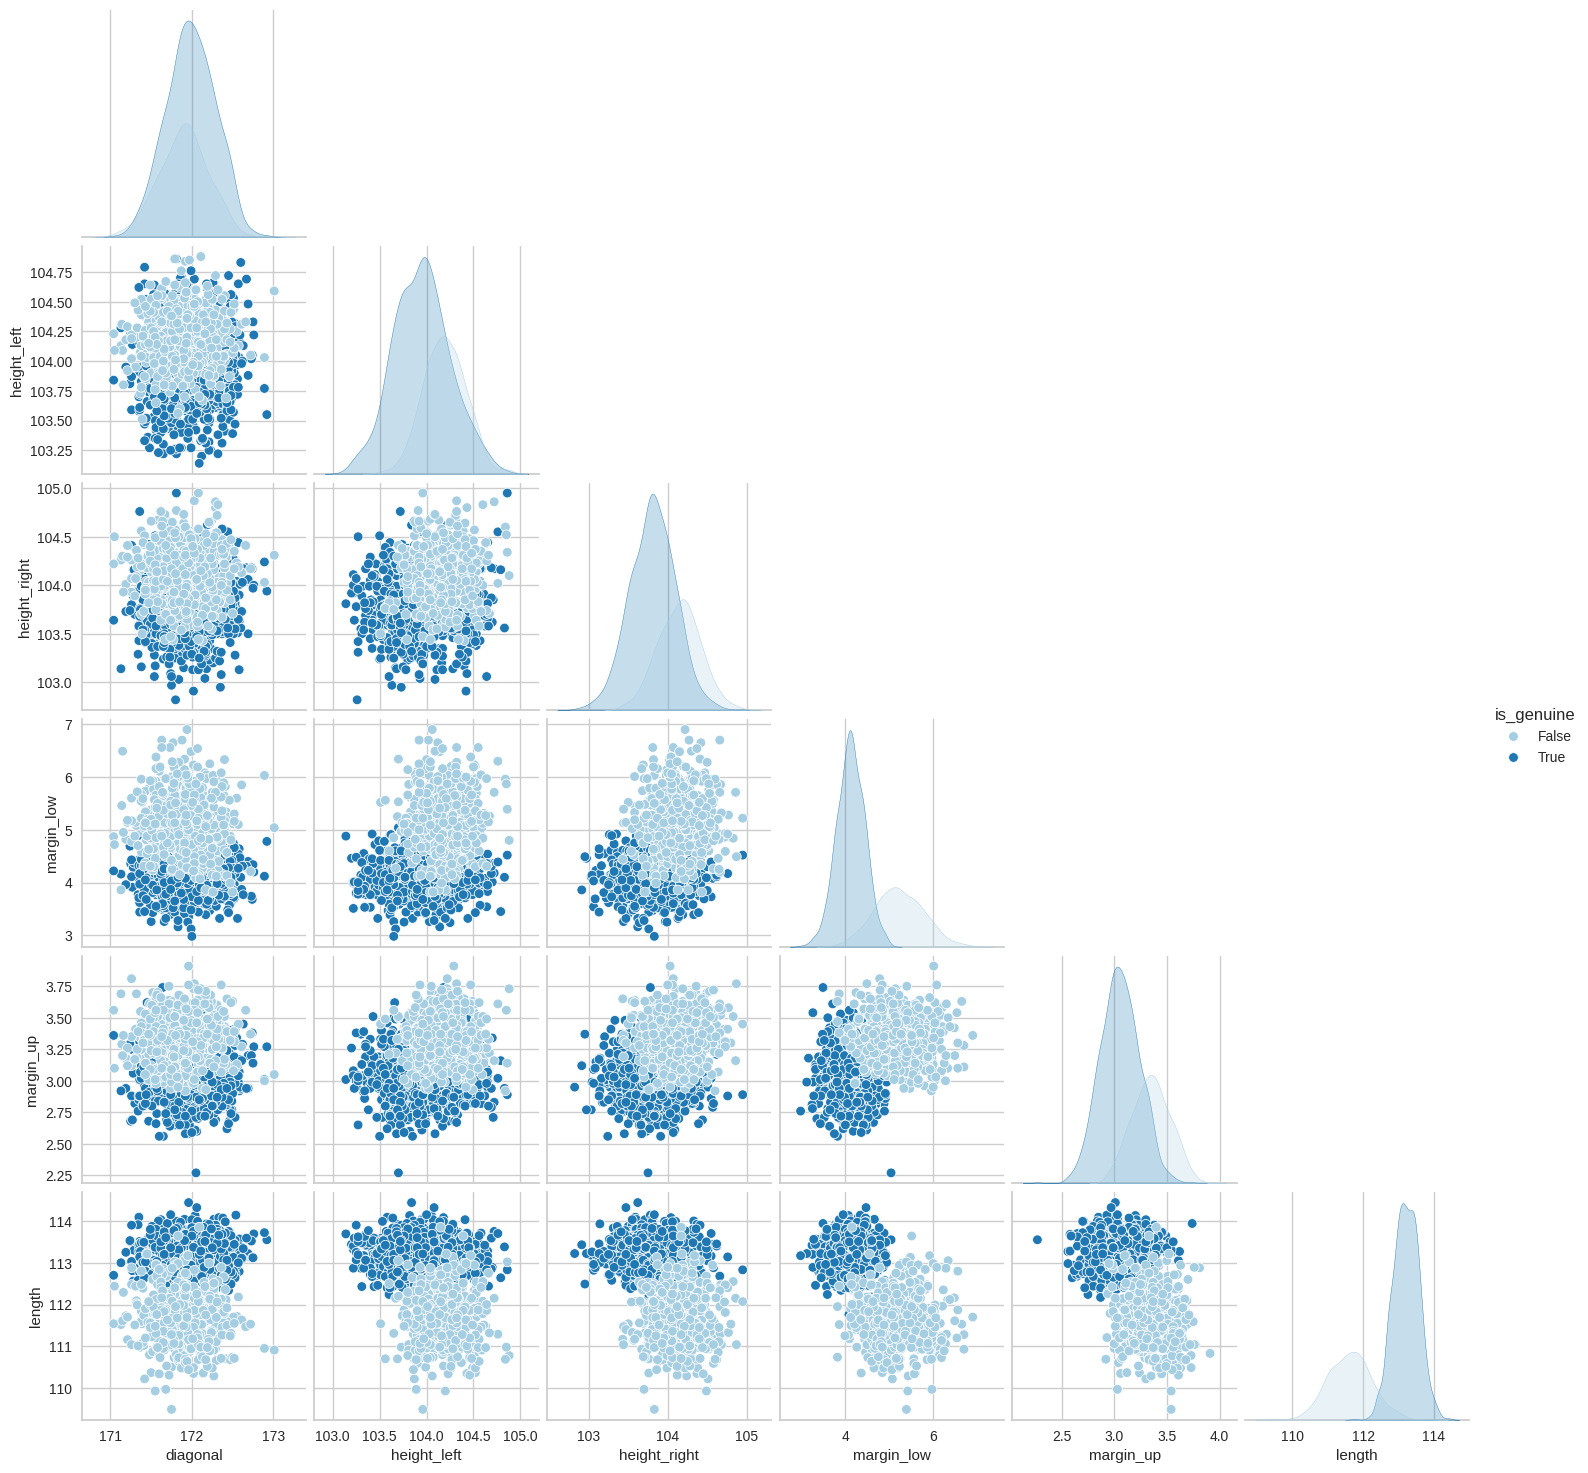

In [14]:
sns.pairplot(data, hue="is_genuine", palette="Paired", corner=True, diag_kind="kde");

## Plotly

In [15]:
px.scatter_matrix(data,
                  color="is_genuine",
                  width=None,
                  height=800,)

## Corrélation

In [16]:
data.select_dtypes(include=[int, float]).corr(method="pearson")

,diagonal,height_left,height_right,margin_low,margin_up,length
diagonal,1.000000,0.019472,-0.024492,-0.111534,-0.055649,0.097587
height_left,0.019472,1.000000,0.242279,0.302643,0.246522,-0.320863
height_right,-0.024492,0.242279,1.000000,0.391085,0.307005,-0.401751
margin_low,-0.111534,0.302643,0.391085,1.000000,0.431606,-0.666753
margin_up,-0.055649,0.246522,0.307005,0.431606,1.000000,-0.520575
length,0.097587,-0.320863,-0.401751,-0.666753,-0.520575,1.000000


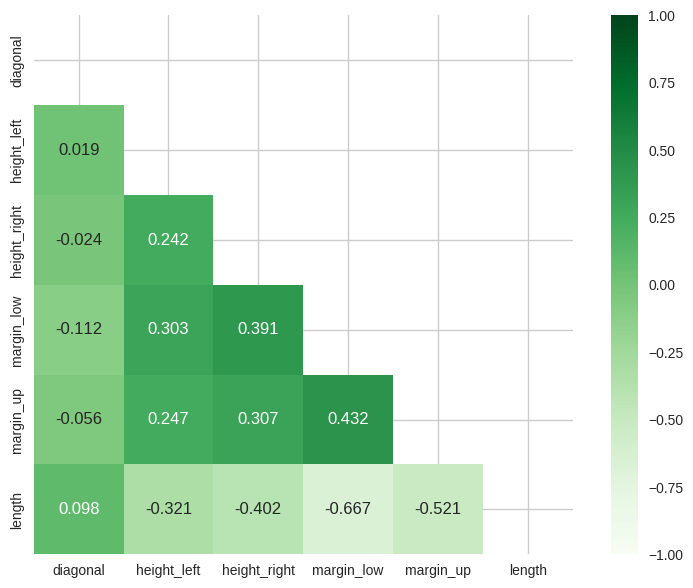

In [17]:
# correlation plot
plt.figure(figsize=(10, 7))
corr = data.select_dtypes(include=[int, float]).corr(method="pearson")
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, cmap='Greens', annot=True, square=True,
            fmt='.3f',
            mask=mask,
            cbar=True, vmin=-1, vmax=1);

## Profiling report

In [18]:
prf.__version__

NameError: name 'prf' is not defined

In [ ]:
# Generate a profile report from a Dataset stored as a pandas `DataFrame`.

profile = ProfileReport(data, title="Profiling Report")
profile.to_notebook_iframe()  # Used to output the HTML representation to a Jupyter notebook.
# profile.to_file("data_report.html")  # Write the report to a file.

In [ ]:
profile.to_file("data_report.html")  # Write the report to a file.

# Modeling

In [20]:
from sklearn import linear_model

import statsmodels.formula.api as smf
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from statsmodels.stats.diagnostic import het_white , normal_ad

La variable cible ne doit par avoir de valeurs nulles car il est impossible qu'on billet ne puisse pas avoir de margin_low. Donc, nous allons entrainer et évaluer le modèles sur l'ensemble des données complété à 100%.

Dans ce jeu de données, la seule variable ayant des valeurs manquantes est `margin_low` alors on va faire le filter des valeurs nulles, comme suit:

In [21]:
data_model = data.loc[lambda dfr: dfr.margin_low.notnull()]

data_model.info() #selection des lignes ou margin_low n'est pas nulle

<class 'pandas.core.frame.DataFrame'>
Index: 1463 entries, 0 to 1499
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   is_genuine    1463 non-null   bool   
 1   diagonal      1463 non-null   float64
 2   height_left   1463 non-null   float64
 3   height_right  1463 non-null   float64
 4   margin_low    1463 non-null   float64
 5   margin_up     1463 non-null   float64
 6   length        1463 non-null   float64
dtypes: bool(1), float64(6)
memory usage: 81.4 KB


In [22]:
# Création des variables explicatives et cible:
# X est la liste des variables explicatives et y est la variable cible
X = data_model.loc[:, ["diagonal", "height_left", "height_right", "margin_up", "length"]]  # ou data.drop(["margin_low", "is_genuine"], axis=1)
y = data_model.loc[:, 'margin_low']

In [23]:
X.head()

,diagonal,height_left,height_right,margin_up,length
0,171.81,104.86,104.95,2.89,112.83
1,171.46,103.36,103.66,2.99,113.09
2,172.69,104.48,103.50,2.94,113.16
3,171.36,103.91,103.94,3.01,113.51
4,171.73,104.28,103.46,3.48,112.54


In [24]:
y.head()

,margin_low
0,4.52
1,3.77
2,4.40
3,3.62
4,4.04


## Train / Test split

In [25]:
# Séparons nos données en un jeu d'entraînement et un jeu de test :
# 30% des données dans le jeu de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Train set - X: {X_train.shape} ; y: {y_train.shape} \nTest set - X: {X_test.shape} ; y: {y_test.shape}")

Train set - X: (1024, 5) ; y: (1024,) 
Test set - X: (439, 5) ; y: (439,)


## Standardisation

In [26]:
# Standardisons les données :

std_scaler = StandardScaler().fit(X_train)  # Standardize features by removing the mean and scaling to unit variance.
X_train_std = std_scaler.transform(X_train)
X_test_std = std_scaler.transform(X_test)

In [27]:
X_train

,diagonal,height_left,height_right,margin_up,length
1243,171.64,104.20,104.10,3.60,112.72
1348,171.84,104.32,104.50,3.00,111.06
137,171.60,104.02,103.90,3.15,113.15
607,171.91,104.17,103.62,2.89,112.73
1198,172.05,104.20,104.11,3.37,111.18
...,...,...,...,...,...
1161,171.92,104.29,104.27,3.13,111.37
1328,172.10,104.22,103.99,3.24,111.94
884,172.57,103.78,103.65,3.04,113.00
1496,172.19,104.63,104.44,3.37,110.97


In [28]:
X_train_std

array([[-1.07074174,  0.5462928 ,  0.54806196,  1.91843401,  0.05088625],
       [-0.40647448,  0.94600971,  1.77308884, -0.68168479, -1.8514336 ],
       [-1.20359519, -0.05328258, -0.06445149, -0.03165509,  0.54365585],
       ...,
       [ 2.01810103, -0.85271641, -0.83009329, -0.50834354,  0.37175948],
       [ 0.75599323,  1.97861174,  1.58933481,  0.9217218 , -1.95457142],
       [ 0.4238596 , -1.11919435,  1.06869838,  1.52841619, -0.54502117]])

## Linear regression

In [29]:
# On crée un modèle de régression linéaire
lr = linear_model.LinearRegression()

# On entraîne ce modèle sur les données d'entrainement
lr.fit(X_train, y_train)

# On récupère l'erreur de norme 2 sur le jeu de données test comme baseline
lr_error = np.mean((lr.predict(X_test) - y_test) ** 2)

# On obtient l'erreur quadratique ci-dessous
print(lr_error)

0.216245240163545


In [30]:
print("Intercept:", lr.intercept_)
print("Coefficients:", lr.coef_)

Intercept: 18.871015985107135
Coefficients: [-0.08786741  0.1766823   0.26036458  0.28827054 -0.40492494]


### Validation du modèle

In [31]:
# Instanciation:
reg_lin = smf.ols("margin_low ~ diagonal + height_left + height_right + margin_up + length", data=data_model)

# Calculs:
res_lin = reg_lin.fit()
res_lin.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             margin_low   R-squared:                       0.477
Model:                            OLS   Adj. R-squared:                  0.476
Method:                 Least Squares   F-statistic:                     266.1
Date:                Thu, 14 Nov 2024   Prob (F-statistic):          2.60e-202
Time:                        17:25:23   Log-Likelihood:                -1001.3
No. Observations:                1463   AIC:                             2015.
Df Residuals:                    1457   BIC:                             2046.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       22.9948      9.656      2.382      0.017       4.055      41.935
diagonal        -0.1111      0.041     -2.680      0.007      -0.192      -0.030
height_left      0.1841      0.045      4.113      0.000       0.096       0.272
height_right     0.2571      0.043      5.978      0.000       0.173       0.342
margin_up        0.2562      0.064      3.980      0.000       0.130       0.382
length          -0.4091      0.018    -22.627      0.000      -0.445      -0.374
==============================================================================
Omnibus:                       73.627   Durbin-Watson:                   1.893
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               95.862
Skew:                           0.482   Prob(JB):                     1.53e-21
Kurtosis:                       3.801   Cond. No.                     1.94e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Prediction

In [32]:
import matplotlib.pyplot as plt

In [33]:
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

In [34]:
fig = make_subplots(rows=1, cols=2, shared_yaxes=False)

for idx, (name, y_true, y_pred) in enumerate([("Train", y_train, y_train_pred),
                                              ("Test", y_test, y_test_pred),
                                             ]):
    col = idx + 1
    fig.add_trace(go.Scatter(x=y_true, y=y_pred, mode="markers", name=name), row=1, col=col)

    fig.add_shape(type="line",
              x0=y_true.min(), x1=y_true.max(),
              y0=y_true.min(), y1=y_true.max(),
              row=1, col=col)

fig.show()

### Analyse des résidus

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names



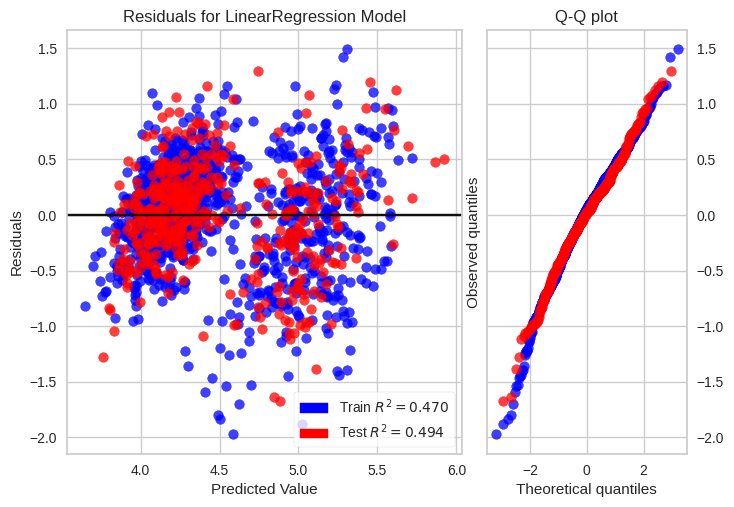

<Figure size 800x550 with 0 Axes>

In [35]:
res_viz = ResidualsPlot(lr,
                        is_fitted="auto",
                        qqplot=True,
                        hist=False,
                        train_color="blue",
                        test_color="red",
                       )
res_viz.fit(X_train, y_train)
res_viz.score(X_test, y_test)
res_viz.show(clear_figure=True);

### Test d'hypothèses

In [36]:
# La moyenne des residus est:
res_lin.resid.mean()

2.4552335557676244e-13

#### Normalité


Une `p-value < alpha` (5%, en général) pour le test d'Anderson-Darling indique que l'hypothèse nulle de normalité de la distribution des résidus est rejetée.



In [37]:
# Normalite:
print("La p-value du test d'Aderson-Darling vaux", normal_ad(res_lin.resid)[1])

La p-value du test d'Aderson-Darling vaux 5.114137678791534e-12


Ici, l'hypothèse H0 est rejetée puisque la p-value obtenue est inférieure à 5% (ou 1%), les résidus ne suivent pas une distribution Normale.

#### Homoscedasticite

**Test de White**
- L'hypothèse nulle (H0): est qu'il y a homoscédasticité (les résidus sont dispersés aléatoirement, la variance d'un individu à un autre est constante)
- L'hypothèse alternative (H1): est qu'il y a hétéroscédasticité.



In [38]:
# Homoscedasticite:
white_test = het_white(res_lin.resid, res_lin.model.exog)
labels_white_test = ["Test Statistic", "p-value", "F-Statistic", "F-Test p-value"]
print(dict(zip(labels_white_test, white_test)))

{'Test Statistic': 109.86015196855712, 'p-value': 2.0828244990710486e-14, 'F-Statistic': 5.853731207795246, 'F-Test p-value': 4.97486509293929e-15}


On fixe un seuil alpha de 5 %, la p-value est ici très inférieure au seuil, on ne peut pas accepter l'hypothèse nulle d'homoscédasticité. L'hypothèse d'homoscédasticité de notre régression linéaire est donc considérée comme vérifiée au risque alpha 5%.

#### Multicolinéarité

La multicolinéarité se produit lorsque les variables indépendantes sont trop fortement corrélées entre elles.

Le facteur d'inflation de la variance VIF* identifie la corrélation entre les variables indépendantes et la force de cette corrélation. [Si VIF >1 & VIF <5 corrélation modérée, VIF > 5 niveau critique de multicollinéarité.

In [39]:
# Check for Multicollinearity
# Variance Inflation Factor (VIF)
r_square_test = metrics.mean_squared_error(y_test, lr.predict(X_test), squared=True)
vif = 1 / (1 - r_square_test)
vif

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



1.2759093165937117

## Ridge

Comme vu dans le chapitre sur la régression ridge, on doit trouver un coefficient de régularisation adapté. Pour rappel, l'objectif est de biaiser un peu la prédiction, afin de diminuer l'erreur standard.

On appelle ce coefficient alpha, on va en tester `alpha=1.`


In [40]:
# On crée un modèle de régression linéaire
ridge = linear_model.Ridge(alpha=1.)

# On entraîne ce modèle sur les données d'entrainement
ridge.fit(X_train, y_train)

# On récupère l'erreur de norme 2 sur le jeu de données test
ridge_error = np.mean((ridge.predict(X_test) - y_test) ** 2)


# On obtient l'erreur quadratique ci-dessous
print(ridge_error)

0.2162136226425016


In [41]:
mse = metrics.mean_squared_error(ridge.predict(X_test), y_test)
rmse = np.sqrt(mse)  # metrics.mean_squared_error(ridge.predict(X_test), y_test, squared=False)
mae = metrics.mean_absolute_error(ridge.predict(X_test), y_test)

mse, rmse, mae

(0.2162136226425016, 0.4649877661213267, 0.3562931945556512)

## Définition d'une fonction d'entrainement

In [42]:
def train_model(model, x_train, y_train, x_test, y_test):
    # On entraîne ce modèle sur les données d'entrainement
    model.fit(x_train, y_train)

    # On récupère l'erreur de norme 2 sur le jeu de données train
    error_train = np.mean((model.predict(x_train) - y_train) ** 2)

    # On récupère l'erreur de norme 2 sur le jeu de données test
    error_test = np.mean((model.predict(x_test) - y_test) ** 2)

    # On obtient l'erreur quadratique ci-dessous
    print(f"Model error: {round(error_test, 5)}")
    return {"estimator": model, "error_train": error_train, "error_test": error_test}

In [43]:
# Train and evaluate ridge regression
ridge_error = train_model(model=linear_model.Ridge(alpha=1.),
                          x_train=X_train_std, y_train=y_train,
                          x_test=X_test_std, y_test=y_test)
print(ridge_error)

Model error: 0.21625
{'estimator': Ridge(), 'error_train': 0.23625550349761731, 'error_test': 0.2162527462437182}


## Lasso

In [44]:
# Train and evaluate LASSO regression
lasso_error = train_model(model=linear_model.Lasso(fit_intercept=True, alpha=1.,),
                          x_train=X_train_std, y_train=y_train,
                          x_test=X_test_std, y_test=y_test)
print(lasso_error)

Model error: 0.42698
{'estimator': Lasso(), 'error_train': 0.4460780868530273, 'error_test': 0.42698000593598173}


## Elastic-Net

In [45]:
# Train and evaluate ridge regression
elastic_error = train_model(model=linear_model.ElasticNet(fit_intercept=True, alpha=1, l1_ratio=.5),
                            x_train=X_train, y_train=y_train,
                            x_test=X_test, y_test=y_test)
print(elastic_error)

Model error: 0.42698
{'estimator': ElasticNet(alpha=1), 'error_train': 0.4460780868530273, 'error_test': 0.42698000593598173}


### Exercice:

Dans la cellule précédente, veuillez analyser les variables explicatives: que constatez vous entre le jeu de train et le jeu de test?

# Réponse :

Pour l'analyse des variables explicatives, commençons par récuperer les coefficients des variables explicatives du modèle ElasticNet

In [46]:
# Récupération des coefficients du modèle ElasticNet
coefficients = elastic_error['estimator'].coef_

# Création et affichage d'un DataFrame avec les variables et leurs coefficients
coef_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)
print(coef_df)

       Variable  Coefficient
0      diagonal         -0.0
1   height_left          0.0
2  height_right          0.0
3     margin_up          0.0
4        length         -0.0


Les coefficients du modèle sont nuls ou très proches de zéro et montrent qu'aucune des variables explicatives n'est importante pour prédire la variable cible ; Cela peut provenir entre autres de la colinéarité des variables explicatives ou du réglage des hyperparamètres

*** Analyse de la corrélation des variables explicatives ***




In [47]:
# Calcul de la matrice de corrélation
correlation_matrix = X_train.corr()

# Affichage des corrélations
print("Matrice de Corrélation des Variables Explicatives :")
print(correlation_matrix)


Matrice de Corrélation des Variables Explicatives :
              diagonal  height_left  height_right  margin_up    length
diagonal      1.000000     0.010229     -0.029736  -0.050775  0.077258
height_left   0.010229     1.000000      0.234991   0.276457 -0.328110
height_right -0.029736     0.234991      1.000000   0.295909 -0.386754
margin_up    -0.050775     0.276457      0.295909   1.000000 -0.534437
length        0.077258    -0.328110     -0.386754  -0.534437  1.000000


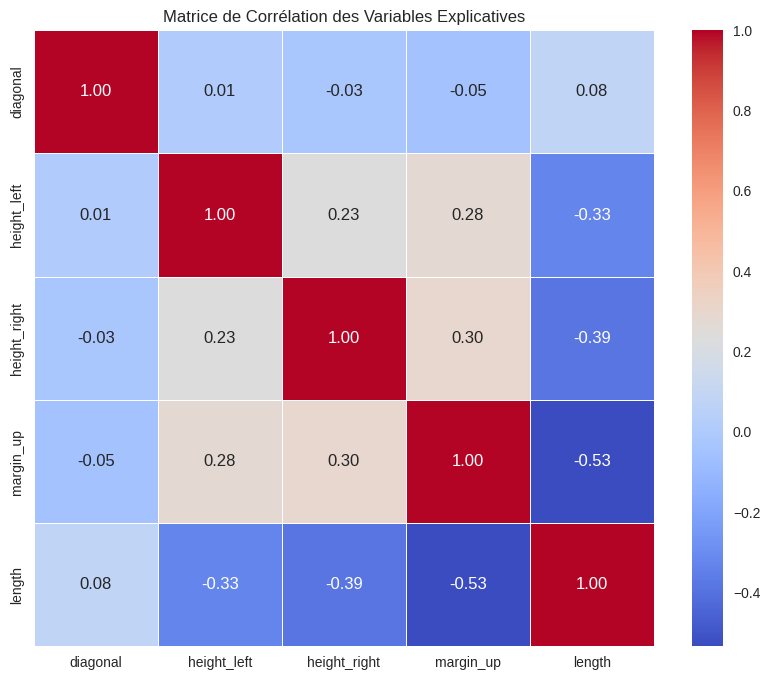

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Calcul de la matrice de corrélation
correlation_matrix = X_train.corr()

# Création de la carte thermique
plt.figure(figsize=(10, 8))  # Taille de la figure
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)

# Ajout du titre
plt.title('Matrice de Corrélation des Variables Explicatives')

# Affichage du graphique
plt.show()


La matrice de corrélation montre de faibles corrélations et des corrélations modérées entre les variables explicatives, ce qui laisse penser que le modèle n'est pas affecté par la multicolinéarité.
Confirmons cela par le test VIF :

In [49]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Ajout d'une constante pour calculer le VIF (si ce n'est pas déjà fait)
X = add_constant(X_train)  # X_train est le DataFrame des variables explicatives

# Calcul du VIF pour chaque variable
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns  # Les noms des variables
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# Affichage du VIF
print(vif_data)


       Variable            VIF
0         const  611416.321117
1      diagonal       1.007715
2   height_left       1.154980
3  height_right       1.206429
4     margin_up       1.437455
5        length       1.582100


Etant donné que les valeurs obtenues pour chaque variable explicative se situent entre 1 et 5 alors la colinéarité est modérée.

Tous les VIFs pour les variables explicatives sont inférieurs à 5, ce qui suggère qu'il n'y a pas de multicolinéarité problématique dans le modèle. Les variables sont relativement indépendantes les unes des autres

# Conclusion :

Entre le jeu de test et le jeu de train on peut constater une différence entre les deux MSE resp.(0,42 et 0,44). L'erreur du modèle est deja relativement élévé mais le fait que l'erreur du train dépasse celui du test peut indiquer un surapprentissage.  

 ElasticNet, avec sa combinaison de Lasso et Ridge, réalise une sélection de variables où certaines sont éliminées pour éviter le surajustement.

Les coefficients nuls du modèle ElasticNet sont un signe que certaines
variables sont jugées non informatives pour prédire la variable cible.

l'analyse de la multicolinéarité  montrent que les valeurs nulles ne sont pas liées à la corrélation entre les variables explicatives.

 Les coefficients nuls sont donc dus probablement à une mauvaise
 régularisation du paramètre alpha.
 L'optimisation de ce paramètre à l'exercice permettra de le confirmer à
 l'exercice2.


Préparation de l'exercice 2:

Afin d'analyser la performance des modèles avant et après optimisation , il sera utile de connaître les coefficients du modèle Ridge pour alpha=1 et les coefficients du modèle Lasso pour alhpa =1 et ratio_l1=0.5

In [50]:
# Récupération les coefficients du modèle RIDGE
coefficients = ridge_error['estimator'].coef_

# Création et affichage d'un DataFrame avec les variables et leurs coefficients
coef_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)
print(coef_df)

       Variable  Coefficient
2  height_right     0.085052
3     margin_up     0.066676
1   height_left     0.053089
0      diagonal    -0.026456
4        length    -0.352888


In [51]:
# Accéder à l'estimateur du modèle Lasso à partir du dictionnaire lasso_error
lasso_model = lasso_error['estimator']

# Extraire les coefficients du modèle Lasso
coefficients = lasso_model.coef_
coef_df = pd.DataFrame({
    'Variable': X_train.columns,
    'Coefficient': coefficients
}).sort_values(by='Coefficient', ascending=False)

# Afficher les coefficients
print(coef_df)


       Variable  Coefficient
0      diagonal         -0.0
1   height_left          0.0
2  height_right          0.0
3     margin_up          0.0
4        length         -0.0


## Pipeline

Dans la plupart des projets de Machine Learning, le **jeu de données** utilisé pour calibrer le modèle doit **subir toute une série de transformations**. Encodage de variables catégorielles, de la normalisation, du feature scaling et autres techniques spécifiques.

Cependant, cette **série de transformations** doit ****être appliquée** plus d'une fois. D'une part, au moment où il faut **entraîner le modèle**, et d'autre part lorsqu'il faut **obtenir une prédiction** pour de nouvelles données. Comment **ne pas mélanger les différentes étapes** et **garantir un traitement consistant entre ces deux étapes** ? C'est tout l'**intérêt des pipelines** de scikit-learn. Ces pipelines vont résoudre un certain nombre de problèmes.

1. **Facilité d'utilisation** : Les pipelines de sklearn simplifient la création et la gestion des workflows de machine learning en regroupant plusieurs étapes de prétraitement des données et de modélisation dans une seule structure. Cela facilite le processus de développement et de déploiement des modèles. Toutes les opérations de transformations vont être centralisées dans le pipeline.

2. **Organisation du code** : Les pipelines permettent d'organiser le code de manière claire et cohérente. Chaque étape du pipeline est définie comme une étape distincte, ce qui facilite la compréhension, la maintenance et le partage du code avec d'autres développeurs. Il sera plus facile d'intégrer ce pipelines à plusieurs endroits dans le code source.

3. **Prétraitement cohérent** : Les pipelines garantissent que les étapes de prétraitement des données sont appliquées de manière cohérente sur l'ensemble des données, y compris sur les données de validation et de test. Cela évite les erreurs courantes telles que le prétraitement des données d'entraînement et de test de manière indépendante, ce qui peut entraîner un biais dans l'évaluation du modèle.

4. **Prévention des fuites de données** : Les pipelines aident à prévenir les fuites de données en s'assurant que les étapes de prétraitement des données sont exécutées à l'intérieur de chaque pli de validation croisée lors de l'évaluation du modèle. Cela garantit que les informations des données de test ne "fuient" pas dans le processus de prétraitement.


Pour illustrer les pipelines de scikit-learn, nous allons utiliser le jeu de données suivant.

In [52]:
from sklearn.pipeline import Pipeline, make_pipeline

from sklearn import set_config

set_config(display="diagram", print_changed_only=True)

In [53]:
# définition de Pipeline de régression avec Pipeline (c'est à nous de données les noms de chaque étape du workflow)
reg_pipe = Pipeline(steps=[("scaler", MinMaxScaler()),
                           ("regressor", linear_model.LinearRegression()),
                          ]
                   )
# ou via make_pipeline (la seule différence est que make_pipeline génère automatiquement des noms pour les étapes).
# reg_pipe = make_pipeline(StandardScaler(), linear_model.LinearRegression())
reg_pipe

Pipeline(steps=[('scaler', MinMaxScaler()), ('regressor', LinearRegression())])

**Les Transformers**

Un Transformer est un objet scikit-learn qui permet d'appliquer une transformation (encodage, normalisation, ...) sur un DataFrame. L'intérêt du Transformer est double.

Pouvoir définir une méthode de transformation sur-mesure.
Pouvoir appliquer cette méthode sur un DataFrame quelconque.

**Les estimators**

Une fois que le pipeline de preprocessing (Transformer) est en place, nous pouvons ajouter la couche prédictive, qui ici est un modèle de regression.

La particularité, c'est que la variable `reg_pipe` n'est pas uniquement le modèle, mais renferme également les étapes de preprocessing que nous appliquons aux données.

Ainsi, qu'il s'agisse d'un `fit` ou d'un `predict`, les données subiront les étapes du preprocessing au préalable.

In [54]:
# Train and evaluate ridge regression
lr_results = train_model(model=reg_pipe,
                       x_train=X_train, y_train=y_train,
                       x_test=X_test, y_test=y_test)

lr_pipe = lr_results["estimator"]

Model error: 0.21625


In [55]:
### Métriques d'évaluation

In [56]:
def get_all_performances(value_train: tuple,
                         values_test: tuple,
                         metrics: list,
                        ) -> pd.DataFrame:
    """ Get all performance metrics listed in `metrics`

    Args:
        value_train (tuple): (y_train, y_train_pred)
        values_test (tuple): (y_test, y_test_pred)
        metrics (list): list of metrics to compute


    Returns:
        pd.DataFrame: column names are: ["metric", "train", "test"]

    """
    test_perfs = []
    train_perfs = []
    metric_names = []
    for metric_func in metrics:
        metric_name = metric_func.__name__
        metric_names.append(metric_name)
        train_perfs.append(metric_func(*value_train))
        test_perfs.append(metric_func(*values_test))
    perfs = {"metric": metric_names, "train": train_perfs, "test": test_perfs,}
    return pd.DataFrame(perfs)

In [57]:
METRICS = [metrics.r2_score,
           metrics.mean_squared_error,
           metrics.mean_absolute_percentage_error,
           metrics.max_error,
          ]

In [58]:
# get performances in train & test
get_all_performances(value_train=(y_train, lr_pipe.predict(X_train)),
                     values_test=(y_test, lr_pipe.predict(X_test)),
                     metrics=METRICS
                    )

,metric,train,test
0,r2_score,0.470372,0.493529
1,mean_squared_error,0.236255,0.216245
2,mean_absolute_percentage_error,0.083693,0.079420
3,max_error,1.975055,1.674400


## Validation croisée

La validation croisée (cross-validation en anglais) est une technique essentielle en machine learning pour évaluer les performances d'un modèle de manière robuste. Elle vise à estimer la capacité de généralisation d'un modèle sur des données non vues, en simulant des situations où le modèle est confronté à de nouveaux exemples.

La validation croisée permet d'obtenir une estimation plus fiable des performances du modèle en évaluant sa capacité à généraliser sur plusieurs partitions des données d'entraînement. Cela aide à éviter le surajustement (overfitting) du modèle à un ensemble de données spécifique et fournit une meilleure indication de ses performances réelles sur des données inconnues.

Voici les étapes générales de la validation croisée :

<img src="https://scikit-learn.org/stable/_images/grid_search_workflow.png" width="400">


Avec sklearn, vous pouvez mettre en place la validation croisée avec le module `sklearn.model_selection`


Voici un exemple de procédure pour mettre en oeuvre la validation croisée et la recherche de smeilleurs hyperparamètres.

<img src="https://scikit-learn.org/stable/_images/grid_search_cross_validation.png" width="500">

In [59]:
from sklearn.model_selection import cross_val_score, cross_validate, cross_val_predict, GridSearchCV

In [60]:
# Pour lister les noms des métriques à fournir à scoring, vous pouvez consulter le site de sklearn ou
# éxecuter dans une cellule de code: sklearn.metrics.SCORERS.
# Avec cross_validation, il est possible d'optimiser le modèle avec plusieurs métriques d'évaluation.

scores = cross_validate(reg_pipe, X_train, y_train, cv=5,
                        scoring=["r2"],  # ["r2", "neg_root_mean_squared_error"]
                        return_train_score=True,
                        verbose=True,
                       )
scores

{'fit_time': array([0.01093912, 0.01127648, 0.00768304, 0.00700855, 0.0069344 ]),
 'score_time': array([0.0038445 , 0.0058682 , 0.00341487, 0.00339103, 0.00805974]),
 'test_r2': array([0.3807582 , 0.50415093, 0.47790462, 0.42193043, 0.51484226]),
 'train_r2': array([0.49122706, 0.46125203, 0.46426527, 0.4813997 , 0.458783  ])}

In [61]:
pd.DataFrame(scores)

,fit_time,score_time,test_r2,train_r2
0,0.010939,0.003844,0.380758,0.491227
1,0.011276,0.005868,0.504151,0.461252
2,0.007683,0.003415,0.477905,0.464265
3,0.007009,0.003391,0.421930,0.481400
4,0.006934,0.008060,0.514842,0.458783


In [62]:
cross_val_score(reg_pipe, X_train, y_train, cv=5, scoring="r2")

array([0.3807582 , 0.50415093, 0.47790462, 0.42193043, 0.51484226])

## Hyperparameters tuning

Le réglage des hyperparamètres (hyperparameter tuning en anglais) est une étape importante dans le développement de modèles de machine learning. Les hyperparamètres sont des paramètres qui ne sont pas appris par le modèle lui-même, mais qui doivent être spécifiés avant l'entraînement du modèle. Ils contrôlent le comportement et les performances du modèle.


Il est important de noter que le réglage des hyperparamètres est un processus itératif et peut nécessiter plusieurs itérations pour trouver la meilleure combinaison. Des techniques avancées telles que l'optimisation bayésienne (`optuna`, `hyperopt`, `sklearn`, `Tune`, `BayesianOptimization`), la recherche aléatoire (`RandomizedSearchCV`), les algorithmes génétiques, etc., peuvent également être utilisées pour explorer efficacement l'espace des hyperparamètres.

Nous allons, pour la suite, tester l'optimisation des hyperparamètres avec `sklearn`.

Voici quelques étapes générales pour le réglage des hyperparamètres :

1. **Sélection des hyperparamètres** : Tout d'abord, identifiez les hyperparamètres pertinents pour votre modèle. Cela dépendra du type de modèle que vous utilisez. Par exemple, pour un modèle de régression linéaire, le coefficient de régularisation (alpha) peut être un hyperparamètre important, tandis que pour un modèle de forêt aléatoire, le nombre d'arbres (n_estimators) et la profondeur maximale des arbres (max_depth) peuvent être des hyperparamètres clés.

2. **Définition de la grille de recherche** : Pour chaque hyperparamètre sélectionné, définissez une plage de valeurs possibles ou une liste de valeurs spécifiques à tester. Il est courant d'utiliser une approche de recherche par grille (grid search) où toutes les combinaisons possibles d'hyperparamètres sont évaluées. Cependant, d'autres méthodes d'optimisation, telles que l'optimisation bayésienne, peuvent également être utilisées.

3. **Évaluation des performances** : Définissez une métrique d'évaluation appropriée pour mesurer les performances du modèle, comme l'exactitude (accuracy), la précision (precision), le rappel (recall), le F-mesure (F1-score), etc. Cette métrique sera utilisée pour comparer les performances des modèles avec différents réglages d'hyperparamètres.

4. **Entraînement et évaluation des modèles** : Pour chaque combinaison d'hyperparamètres dans la grille de recherche, entraînez le modèle sur les données d'entraînement et évaluez ses performances sur les données de validation à l'aide de la métrique d'évaluation choisie. Ceci est généralement fait en utilisant la validation croisée (cross-validation) pour obtenir une estimation plus fiable des performances.

5. **Sélection des meilleurs hyperparamètres** : Une fois que tous les modèles ont été évalués, comparez les performances et identifiez la combinaison d'hyperparamètres qui donne les meilleurs résultats selon la métrique d'évaluation choisie. C'est cette combinaison qui sera utilisée comme les hyperparamètres finaux pour le modèle.

6. **Test final et évaluation** : Une fois que vous avez sélectionné les meilleurs hyperparamètres, entraînez le modèle sur l'ensemble des données d'entraînement, y compris les données de validation, et évaluez-le sur un ensemble de test indépendant pour obtenir une estimation finale de ses performances.

In [63]:
reg_pipe

Pipeline(steps=[('scaler', MinMaxScaler()), ('regressor', LinearRegression())])

In [64]:
reg_pipe.named_steps

{'scaler': MinMaxScaler(), 'regressor': LinearRegression()}

In [65]:
param_grid = {
    "regressor__fit_intercept": [True, False],
}

grid_search = GridSearchCV(reg_pipe, param_grid, cv=10, scoring="r2", return_train_score=True)
grid_search

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                       ('regressor', LinearRegression())]),
             param_grid={'regressor__fit_intercept': [True, False]},
             return_train_score=True, scoring='r2')

In [66]:
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print(f"Best params: {best_params}")


Best params: {'regressor__fit_intercept': True}


In [67]:
print(f"Internal CV score: {grid_search.best_score_: .3f}")

Internal CV score:  0.457


In [68]:
grid_cv_results = grid_search.cv_results_

In [69]:
pd.DataFrame(grid_cv_results)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_regressor__fit_intercept,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.009927,0.002026,0.004874,0.001561,True,{'regressor__fit_intercept': True},0.324875,0.455784,0.440131,0.496866,...,0.470914,0.465793,0.464958,0.466923,0.478213,0.471587,0.459606,0.470418,0.470702,0.007262
1,0.011139,0.004547,0.007445,0.007236,False,{'regressor__fit_intercept': False},-0.238620,-0.633217,-0.509765,-0.141505,...,-0.365767,-0.405348,-0.369625,-0.370102,-0.345983,-0.393245,-0.427151,-0.377242,-0.380330,0.022750


## Importance des variables

In [70]:
grid_search.predict(X_test)

array([4.96952674, 4.30554166, 4.37300759, 4.08410376, 4.00749652,
       4.09511292, 4.86098204, 4.12242255, 4.19436321, 3.84083019,
       5.15347379, 4.13702967, 4.44730181, 4.07859353, 5.920232  ,
       4.10265579, 4.13509451, 3.95720873, 4.16453648, 5.11052755,
       4.22849691, 4.78867524, 5.01414919, 4.0989596 , 4.06903696,
       3.99708914, 4.17333833, 4.09592705, 4.92466552, 4.2389451 ,
       5.10135736, 4.14792   , 4.49804141, 4.19250348, 3.98443957,
       4.1826303 , 3.97669416, 5.60052731, 5.71876094, 4.14653594,
       4.26224931, 4.39721242, 4.7907356 , 4.46894664, 5.36203199,
       4.41841805, 4.74113627, 4.94734046, 4.25907858, 4.72398858,
       4.27997822, 4.20962232, 3.93052514, 4.10759606, 4.33554249,
       4.20132988, 4.15349393, 4.38069341, 4.16378971, 5.37982479,
       3.82908575, 4.98917266, 4.04594039, 4.29535145, 4.56923662,
       4.25544661, 3.8982783 , 5.26665224, 5.23638346, 3.97895929,
       4.91737895, 4.37956553, 5.09650965, 4.25841065, 4.01899

In [71]:
df_feature_importance = pd.DataFrame(reg_pipe[-1].coef_, columns=["coef"], index=grid_search.feature_names_in_)
print(f"Shape: {df_feature_importance.shape}")
df_feature_importance.head()

Shape: (5, 1)


,coef
diagonal,-0.161676
height_left,0.293293
height_right,0.531144
margin_up,0.389165
length,-1.761424


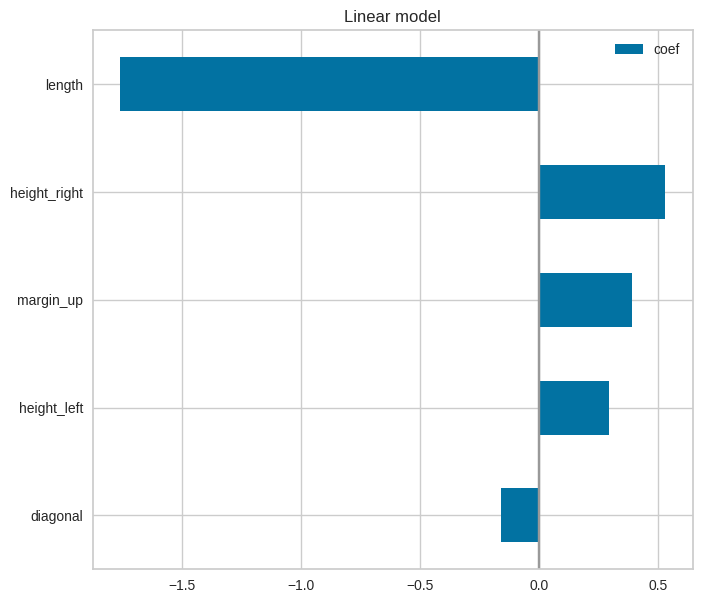

In [72]:
# top30 most important features
(df_feature_importance
 .sort_values("coef", key=lambda v: abs(v), ascending=True)
 .plot(kind="barh", figsize=(10, 7))
)
plt.title("Linear model")
plt.axvline(x=0, color='.6')
plt.subplots_adjust(left=.3);


Exercice2:

- Optimiser les modèles Ridge, Lasso et ElasticNet
- Etudier l'importance des variables dans chaque modèle

# Optimisation du Modèle Ridge

Modèle Ridge

In [128]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# 1. Définition du modèle Ridge
ridge_model = Ridge()

# 2. Création du pipeline (Scaler + Ridge)
reg_pipe = Pipeline([
    ("scaler", StandardScaler()),  # Normalisation des données
    ("regressor", ridge_model)     # Modèle Ridge
])

# 3. Définition de la grille de recherche pour alpha
param_grid = {
    "regressor__alpha": np.arange(10, 12, 0.01),  # Recherche alpha entre 10 et 12 avec un pas de 0.01
    "regressor__fit_intercept": [True, False]      # Essayer avec ou sans interception
}



In [129]:
from sklearn.model_selection import GridSearchCV

# GridSearchCV pour optimiser les hyperparamètres
grid_search = GridSearchCV(reg_pipe, param_grid, cv=8, scoring='r2', return_train_score=True)

# Entraînement avec GridSearchCV
grid_search.fit(X_train, y_train)

# Affichage des meilleurs paramètres trouvés
print(f"Meilleurs paramètres : {grid_search.best_params_}")
print(f"Meilleure performance sur le train (R2) : {grid_search.best_score_}")
# 6. Prédiction sur le test
y_pred_test = grid_search.predict(X_test)
print(f"R2 score sur le test : {r2_score(y_test, y_pred_test)}")



Meilleurs paramètres : {'regressor__alpha': 11.989999999999958, 'regressor__fit_intercept': True}
Meilleure performance sur le train (R2) : 0.4606842731548956
R2 score sur le test : 0.493280638567412



Le meilleur paramètre obtenu après optimisation est : alpha = 11,98. Avec ce paramètre, le modèle atteint un R2
  de 0,46 sur l'ensemble d'entraînement, ce qui signifie qu'il explique environ 46 % de la variance des données d'entraînement. Sur l'ensemble de test, le R2de 0,49 montre une performance similaire, indiquant que le modèle généralise correctement et n’est ni en surapprentissage ni en sous-apprentissage.
  Cependant le R2 reste toutefois relativement faible.





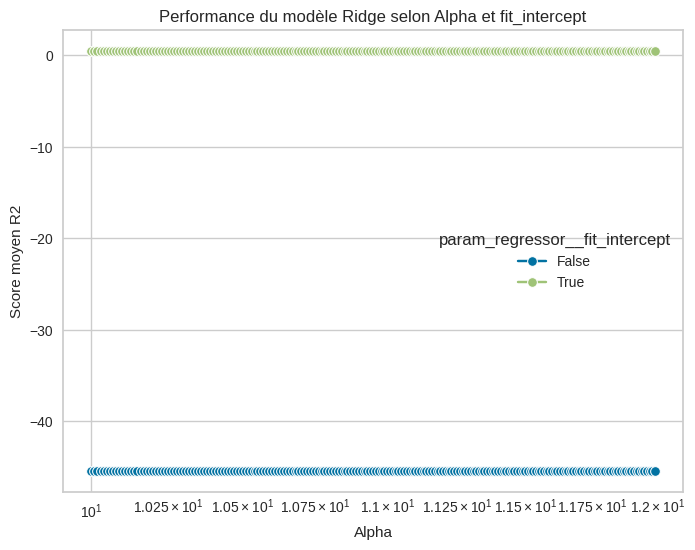

In [124]:
# Visualisation des résultats de la recherche par grille
results = pd.DataFrame(grid_search.cv_results_)
results = results[['param_regressor__alpha', 'param_regressor__fit_intercept', 'mean_test_score', 'std_test_score']]


# Visualisation de la performance selon alpha
plt.figure(figsize=(8, 6))
sns.lineplot(data=results, x='param_regressor__alpha', y='mean_test_score', hue='param_regressor__fit_intercept', marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Score moyen R2')
plt.title('Performance du modèle Ridge selon Alpha et fit_intercept')
plt.show()

le graphique suggère que l'optimisation de alpha n'a pas une grande influence sur la performance du modèle.

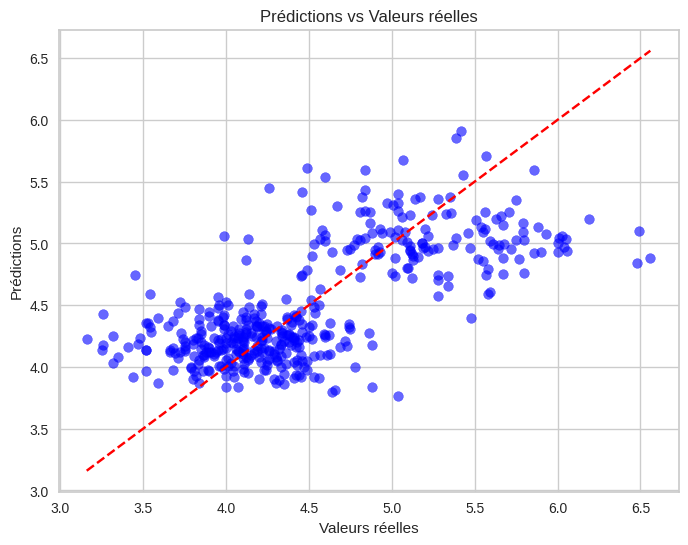

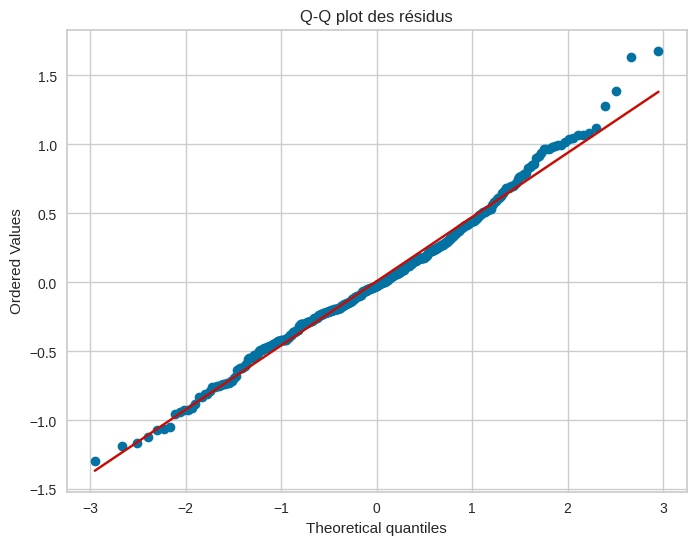

In [125]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Prédictions sur les données de test
y_pred_test_ridge = grid_search.predict(X_test)

# Graphique des prédictions vs valeurs réelles
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test_ridge, color='blue', alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')  # ligne de la prédiction idéale
plt.title('Prédictions vs Valeurs réelles')
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.show()

# Q-Q plot des résidus (erreurs)
residuals = y_test - y_pred_test_ridge

plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q plot des résidus')
plt.show()


Le graphique 1 montre une prédiction qui n'est pas très bonne puisque les points ont tendance à être autour de la droite;
Et ce malgré que le QQ plot laisse également penser que les résidus suivent une loi normale

**Importance des variables**

Shape du DataFrame des coefficients: (5, 1)
Les premières lignes du DataFrame des coefficients :
                  coef
diagonal     -0.026463
height_left   0.053583
height_right  0.085434
margin_up     0.068320
length       -0.347969


<Figure size 1200x800 with 0 Axes>

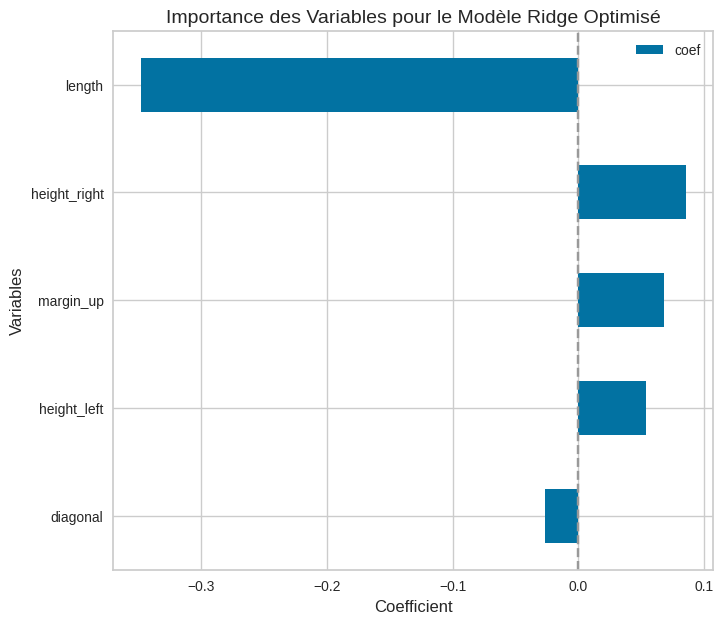

In [126]:
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
# 1. Accéder au modèle Ridge optimisé après GridSearchCV
best_ridge_model = grid_search.best_estimator_

# 2. Accéder à l'étape "regressor" dans le pipeline, qui contient le modèle Ridge
ridge_model = best_ridge_model.named_steps['regressor']
# 3. Récupérer les coefficients du modèle Ridge optimisé
coefficients = ridge_model.coef_

# 4. Créer un DataFrame pour associer les coefficients aux noms des variables
df_feature_importance = pd.DataFrame(coefficients, columns=["coef"], index=grid_search.feature_names_in_)

# 5. Afficher les informations sur le DataFrame des coefficients
print(f"Shape du DataFrame des coefficients: {df_feature_importance.shape}")
print("Les premières lignes du DataFrame des coefficients :")
print(df_feature_importance.head())

# 6. Trier les coefficients par valeur absolue pour identifier les variables les plus importantes
df_feature_importance_sorted = df_feature_importance.sort_values("coef", key=lambda v: abs(v), ascending=True)

# 7. Visualisation de l'importance des variables avec un graphique en barres horizontales
plt.figure(figsize=(12, 8))  # Définir la taille du graphique
df_feature_importance_sorted.plot(kind="barh", figsize=(10, 7))  # Création du graphique en barres horizontales

# 8. Personnalisation du graphique
plt.title("Importance des Variables pour le Modèle Ridge Optimisé", fontsize=14)  # Titre du graphique
plt.xlabel("Coefficient", fontsize=12)  # Label de l'axe des X
plt.ylabel("Variables", fontsize=12)  # Label de l'axe des Y
plt.axvline(x=0, color='.6', linestyle='--')  # Ligne verticale à x=0 pour séparer les variables positives et négatives

# 9. Ajustement de l'affichage du graphique
plt.subplots_adjust(left=0.3)  # Ajuster les marges pour éviter que les noms des variables ne soient coupés

# 10. Affichage du graphique
plt.show()



Après optimisation de alpha, aucun des coefficients n'est nul.Les variables avec le plus grand impact sur la prédiction sont length (qui a un grand impact négatif) et height_right (qui a un impact positif important).

       Variable  Coefficient Avant  Coefficient Après
0      diagonal          -0.026463          -0.026463
1   height_left           0.053579           0.053583
2  height_right           0.085431           0.085434
3     margin_up           0.068307           0.068320
4        length          -0.348009          -0.347969


<Figure size 1200x600 with 0 Axes>

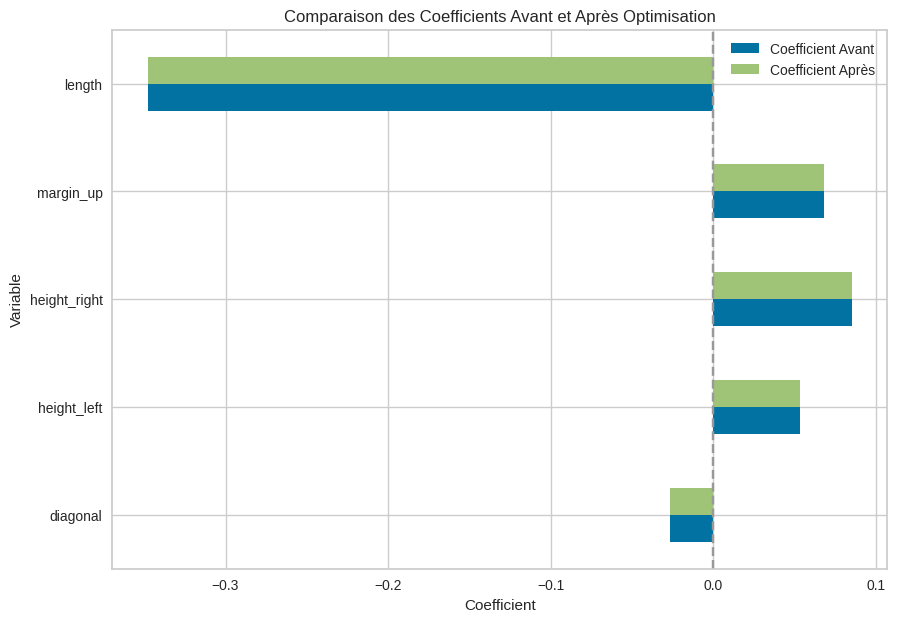

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Coefficients avant optimisation (que vous avez fournis)
coefficients_avant = {
    'diagonal': -0.026463,
    'height_left': 0.053579,
    'height_right': 0.085431,
    'margin_up': 0.068307,
    'length': -0.348009
}

# Coefficients après optimisation (issus de votre modèle Ridge optimisé)
# Notez que les coefficients doivent être extraits correctement, donc utilisez les noms des variables ou une liste de coefficients
coefficients_apres = {
    'diagonal':  -0.026463,
'height_left':0.053583,
'height_right': 0.085434,
'margin_up': 0.068320,
'length ': -0.347969

}

# Comparaison des coefficients avant et après optimisation
df_comparaison = pd.DataFrame({
    'Variable': coefficients_avant.keys(),
    'Coefficient Avant': list(coefficients_avant.values()),
    'Coefficient Après': list(coefficients_apres.values())
})

# Affichage de la comparaison
print(df_comparaison)

# Visualisation des coefficients avant et après optimisation
plt.figure(figsize=(12, 6))
df_comparaison.set_index('Variable').plot(kind='barh', figsize=(10, 7))
plt.title("Comparaison des Coefficients Avant et Après Optimisation")
plt.axvline(x=0, color='.6', linestyle='--')
plt.xlabel('Coefficient')
plt.ylabel('Variable')
plt.show()

les coefficients après optimisation de alpha ne présentent presque pas de différence; la différence est très faible.

Conclusion sur le modèle Ridge: l'optimisation du paramètre alpha n'a pas eu grand effet l'importance des variables explicatives ni sur le R2 ce qui suggère que le modèle utilisé pourrait ne pas être suffisamment flexible pour capturer la complexité de la relation entre les variables explicatives et la variable cible.

# Optimisation du modèle Lasso

Meilleur alpha trouvé: 0.0001
Meilleure performance sur l'ensemble d'entraînement (R²): 0.4606
Performance sur l'ensemble de test (R²): 0.4935
MSE sur l'ensemble de test: 0.2162


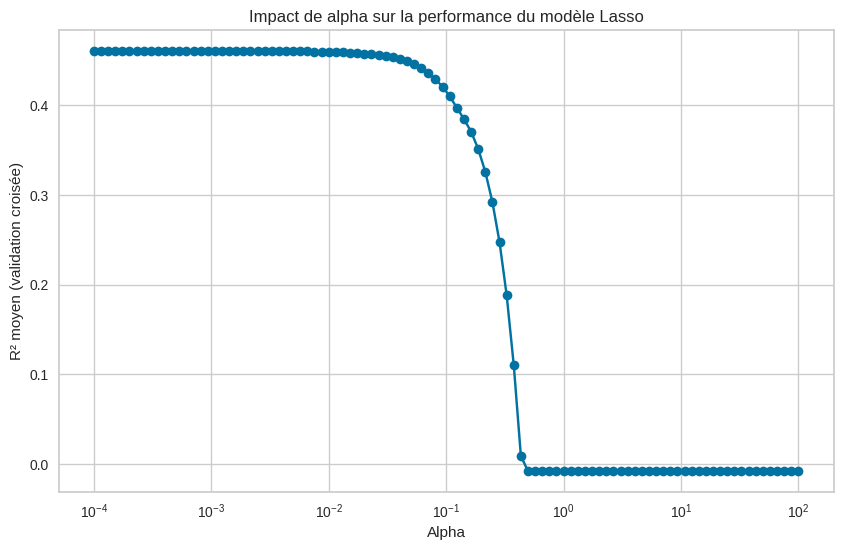

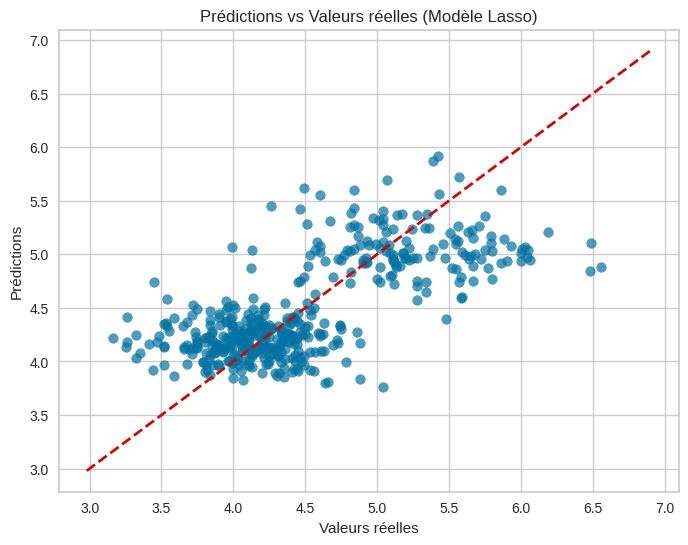

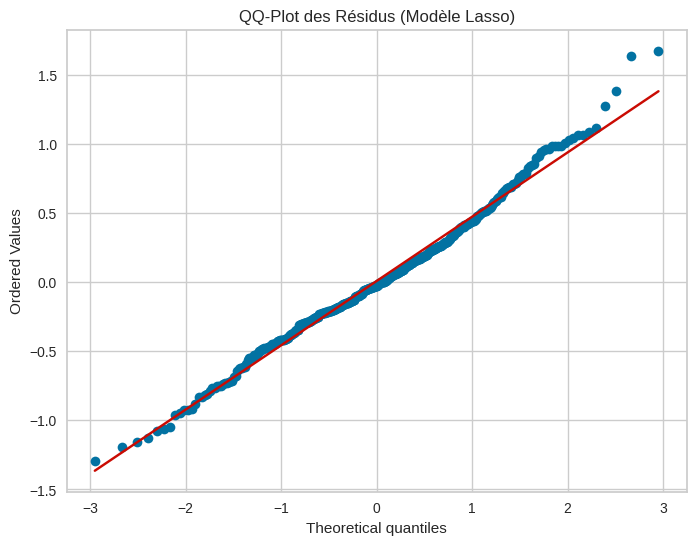

In [105]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from scipy import stats
# 1. Définir la pipeline avec StandardScaler et Lasso
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', Lasso())
])

# 2. Définir la grille de recherche pour le paramètre alpha du modèle Lasso
param_grid = {
    'regressor__alpha': np.logspace(-4, 2, 100)  # Correction pour référencer 'regressor' dans la pipeline
}

# 3. Configurer GridSearchCV pour tester les valeurs de alpha avec validation croisée
grid_search = GridSearchCV(pipeline, param_grid, cv=8, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)

# 4. Extraire les meilleurs paramètres et le meilleur modèle
best_alpha = grid_search.best_params_['regressor__alpha']
best_lasso_model = grid_search.best_estimator_

print(f"Meilleur alpha trouvé: {best_alpha}")
print(f"Meilleure performance sur l'ensemble d'entraînement (R²): {grid_search.best_score_:.4f}")

# 5. Prédiction sur l'ensemble de test
y_pred_test_lasso = best_lasso_model.predict(X_test)
r2_test = r2_score(y_test, y_pred_test_lasso)
mse_test = mean_squared_error(y_test, y_pred_test_lasso)

print(f"Performance sur l'ensemble de test (R²): {r2_test:.4f}")
print(f"MSE sur l'ensemble de test: {mse_test:.4f}")

# 6. Visualisation des résultats de la grille de recherche
results = pd.DataFrame(grid_search.cv_results_)
plt.figure(figsize=(10, 6))
plt.plot(results['param_regressor__alpha'], results['mean_test_score'], marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('R² moyen (validation croisée)')
plt.title('Impact de alpha sur la performance du modèle Lasso')
plt.grid(True)
plt.show()

# 7. Visualiser les prédictions vs les valeurs réelles
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_test_lasso, alpha=0.7)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2)
plt.xlabel('Valeurs réelles')
plt.ylabel('Prédictions')
plt.title("Prédictions vs Valeurs réelles (Modèle Lasso)")
plt.grid(True)
plt.show()

# 8. QQ-plot des résidus pour évaluer la normalité des erreurs
residuals = y_test - y_pred_test_lasso
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("QQ-Plot des Résidus (Modèle Lasso)")
plt.grid(True)
plt.show()


Après optimisation, on obtient alpha= 0.001
Le graphique 1 permet de visualiser l'impact de l'optimisation de la valeur alpha sur le modèle; ici plus le paramètre tend vers 0 plus le modèle est performant.

Le graphique suivant montre une prédiction assez bonne.  
Le qq_plot semble indiquer que les résidus suivent la loi normale ;



       Variable  Coefficient  Importance
4        length    -0.353322    0.353322
2  height_right     0.084958    0.084958
3     margin_up     0.066471    0.066471
1   height_left     0.052977    0.052977
0      diagonal    -0.026361    0.026361


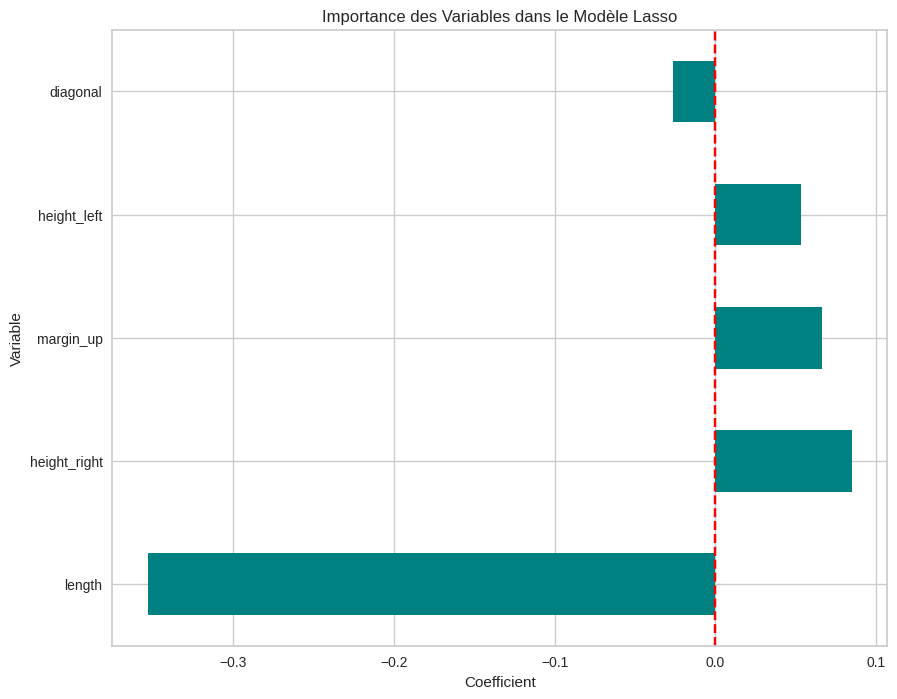

In [86]:
# Extraire les coefficients des variables pour le modèle Lasso optimisé
lasso_coefficients = best_lasso_model.named_steps['regressor'].coef_

# Créer un DataFrame avec les noms des variables et leurs coefficients
df_importance = pd.DataFrame({
    'Variable': X_train.columns,
    'Coefficient': lasso_coefficients
})

# Trier les variables par l'importance absolue des coefficients
df_importance['Importance'] = df_importance['Coefficient'].abs()
df_importance = df_importance.sort_values(by='Importance', ascending=False)

# Afficher les 10 variables les plus importantes
print(df_importance.head(10))

# Visualisation des coefficients
plt.figure(figsize=(10, 8))
df_importance.set_index('Variable')['Coefficient'].plot(kind='barh', color='teal')
plt.title("Importance des Variables dans le Modèle Lasso")
plt.xlabel("Coefficient")
plt.axvline(x=0, color='red', linestyle='--')
plt.show()


Après optimisation du modèle Lasso, les coefficients sont tous non nuls et contribuent à la prédiction de la variable cible mais c'est la variable length qui est la plus importante.

Conclusion sur le modèle Lasso:

L'optimisation du modèle Lasso a permis d'améliorer le modèle non seulement par l'obtention d'un R2 plus élévé , d'un MSE qui passe de 0.4 sur le modele non optimisé à 0.2 sur le modèle optimisé  également par l'amélioration de l'importance des variables explicatives.
En ce sens le modèle lasso optimisé est meilleur que celui qui n'est pas optimisé mais n'est pas pour autant adapté pour expliquer la relation entre les variables explicatives et la variable cible.


ELASTICNET

In [87]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Définir la pipeline avec un scaler et ElasticNet
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Mise à l'échelle des données
    ('elastic_net', ElasticNet(max_iter=5000))  # Augmenter les itérations
])

# Définir la grille de paramètres pour alpha et l1_ratio (si vous souhaitez ajuster l'elasticité)
param_grid = {
    'elastic_net__alpha': np.logspace(-4, 1, 10),  # Test différentes valeurs d'alpha
    'elastic_net__l1_ratio': np.arange(0.001, 1, 0.01) }

# Configurer GridSearchCV avec validation croisée
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres
print(f"Meilleur alpha : {grid_search.best_params_['elastic_net__alpha']}")
print(f"Meilleur l1_ratio : {grid_search.best_params_['elastic_net__l1_ratio']}")
print(f"Meilleure performance R² : {grid_search.best_score_}")


Meilleur alpha : 0.016681005372000592
Meilleur l1_ratio : 0.001
Meilleure performance R² : 0.46007220868084725


Le modèle utilise une régularisation modérée avec un alpha de 0.0167, ce qui équilibre bien l'ajustement et l'éviction du sur-apprentissage. Avec un l1_ratio de 0.001, il privilégie principalement la régularisation Ridge, limitant les coefficients tout en conservant de la flexibilité. Le modèle explique 46% de la variance des données (R² = 0.46), ce qui montre qu'il capte certaines tendances, mais il pourrait être amélioré pour mieux ajuster les données.

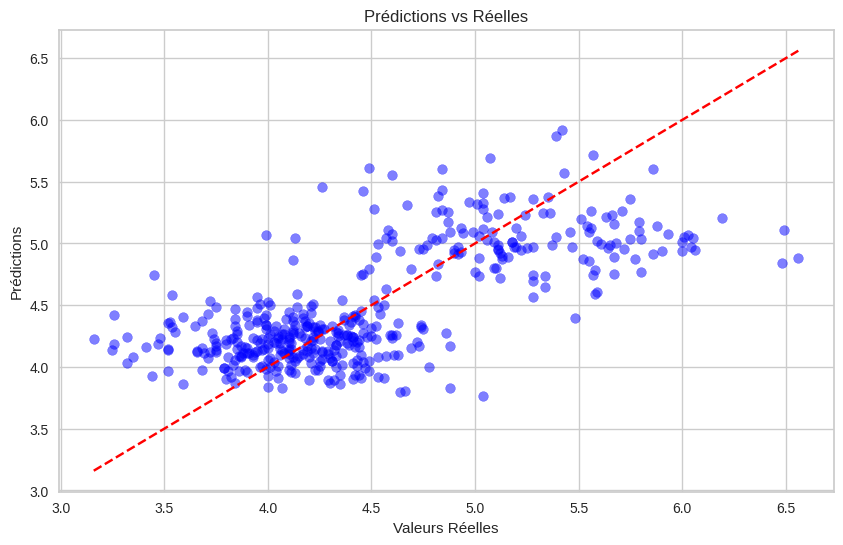

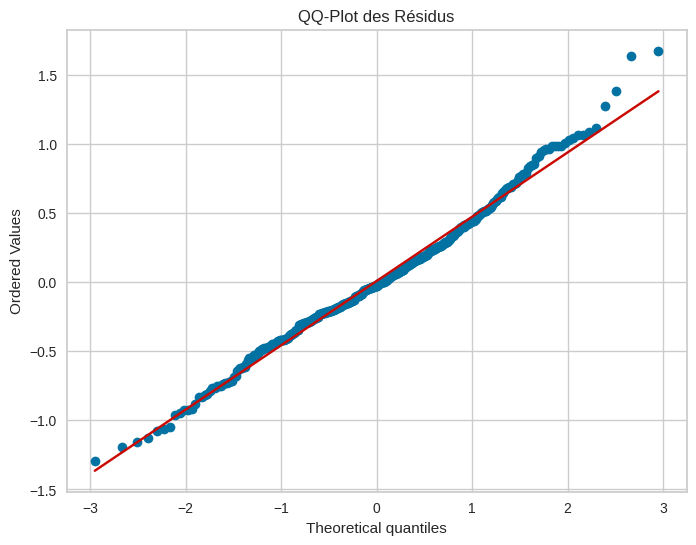

R² sur l'ensemble de test: 0.4935
Erreur quadratique moyenne (MSE) sur l'ensemble de test: 0.2162


In [111]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats
from sklearn.metrics import r2_score, mean_squared_error

# Assigning the best estimator from GridSearchCV to best_model
best_model = grid_search.best_estimator_ # This line is added to assign the best model

# Prédictions sur l'ensemble de test
y_pred = best_model.predict(X_test)

# Visualisation des prédictions
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='blue')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Prédictions vs Réelles')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')
plt.show()

# QQ-Plot pour vérifier la normalité des résidus
residuals = y_test - y_pred
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('QQ-Plot des Résidus')
plt.show()

# Calculer et afficher R² et MSE sur les prédictions
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print(f"R² sur l'ensemble de test: {r2:.4f}")
print(f"Erreur quadratique moyenne (MSE) sur l'ensemble de test: {mse:.4f}")

le R² de 0.4935 sur l'ensemble de test indique que le modèle explique environ 49% de la variance des données de test, ce qui suggère un ajustement raisonnable, bien que le modèle puisse encore être amélioré pour capturer davantage de tendances.
L'erreur quadratique moyenne (MSE) de 0.216 faible.
Cela permet de répondre à l'exercice1 car cela montre que l'optimisation des hyperparamètres améliore la performance du modèle








Importance des variables

Shape du DataFrame des coefficients: (5, 1)
Les premières lignes du DataFrame des coefficients :
                  coef
diagonal     -0.026447
height_left   0.053790
height_right  0.085588
margin_up     0.069033
length       -0.345758


<Figure size 1200x800 with 0 Axes>

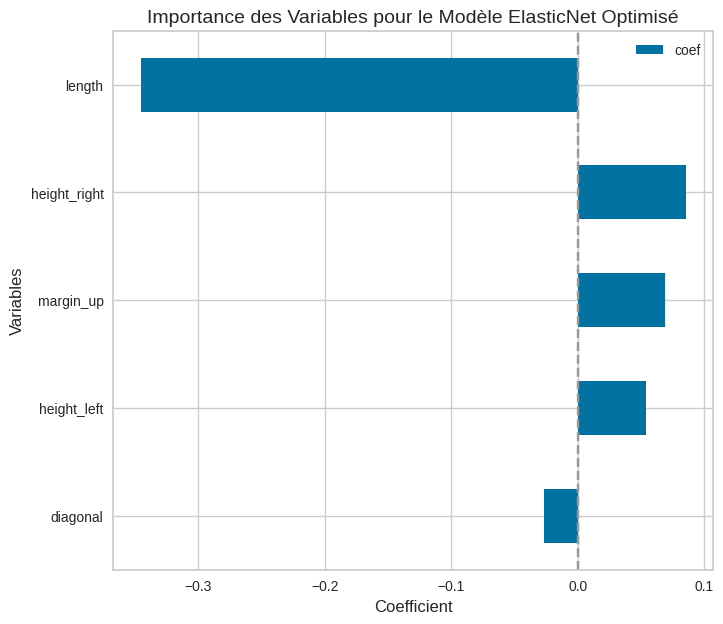

In [90]:
# 1. Accéder au modèle ElasticNet optimisé après GridSearchCV
best_elasticnet_model = grid_search.best_estimator_

# 2. Accéder à l'étape "elastic_net" dans le pipeline, qui contient le modèle ElasticNet
# Correction: Remplacer 'regressor' par 'elastic_net'
elasticnet_model = best_elasticnet_model.named_steps['elastic_net']  # 'elastic_net' est le nom donné au ElasticNet dans le pipeline

# 3. Récupérer les coefficients du modèle ElasticNet optimisé
coefficients = elasticnet_model.coef_

# 4. Créer un DataFrame pour associer les coefficients aux noms des variables
df_feature_importance = pd.DataFrame(coefficients, columns=["coef"], index=grid_search.feature_names_in_)

# 5. Afficher les informations sur le DataFrame des coefficients
print(f"Shape du DataFrame des coefficients: {df_feature_importance.shape}")
print("Les premières lignes du DataFrame des coefficients :")
print(df_feature_importance.head())

# 6. Trier les coefficients par valeur absolue pour identifier les variables les plus importantes
df_feature_importance_sorted = df_feature_importance.sort_values("coef", key=lambda v: abs(v), ascending=True)

# 7. Visualisation de l'importance des variables avec un graphique en barres horizontales
plt.figure(figsize=(12, 8))  # Définir la taille du graphique
df_feature_importance_sorted.plot(kind="barh", figsize=(10, 7))  # Création du graphique en barres horizontales

# 8. Personnalisation du graphique
plt.title("Importance des Variables pour le Modèle ElasticNet Optimisé", fontsize=14)  # Titre du graphique
plt.xlabel("Coefficient", fontsize=12)  # Label de l'axe des X
plt.ylabel("Variables", fontsize=12)  # Label de l'axe des Y
plt.axvline(x=0, color='.6', linestyle='--')  # Ligne verticale à x=0 pour séparer les variables positives et négatives

# 9. Ajustement de l'affichage du graphique
plt.subplots_adjust(left=0.3)  # Ajuster les marges pour éviter que les noms des variables ne soient coupés

# 10. Affichage du graphique
plt.show()

# 11. Optionnel : Enregistrer le graphique si nécessaire
# plt.savefig("feature_importance_elasticnet.png")

Avant optimisation du modèle ElasticNet, tous les coefficients étaient nuls.
 Après optimisation,les coefficients sont tous non nuls.Ce qui montre,par rapport à l'exercice 1 que ce sont les hyperparamètres qui pénalisaient le modèle en diminuant en annulant certaines variables.
 Tous les variables contribuent à la prédiction de la variable cible mais c'estla variable length qui est la plus impactante car ayant le cooefficient le plus élévé en valeur absolue.

Conclusion du modèle ElasticNet :
Tout comme le modèle Lasso, après optimisation des hyperparamètres, il y a amélioration de la performance du modèle visible avec R2 de 0,46 et une amélioration de l'importance des variables explicatives.
Malgré tout, le modèle reste inadapté.

# Conclusion générale


*   L'optimisation du paramètre alpha du modèle Lasso ne permet pas d'obtenir une meilleure performance du modèle

*  En revanche  le modèle Lasso et le modèle ElasticNet enregistrent une amélioration de performances

*  Tous les coefficients après optimisation sont plus élévés. L'importance des variables a augmenté avec une prédominance de la variable Length quelque soit le modèle.


* Cependant le R2 étant relativement faible pour tous les modèles, on peut alors dire que les modèles linéaires ne sont pas assez robustes pour cette prédiction et il faudrait probablement se tourner vers des modèles non linéaires pour avoir un meilleur résultat.




